In [21]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import statsmodels.api as sm

import warnings
warnings.filterwarnings(action='ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import * # scaler
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree

In [22]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

In [23]:
data1 = pd.read_csv('My_dataset1.csv') # 625개 제거
data1_1 = pd.read_csv('My_dataset1_1.csv') # 444개 제거

In [24]:
data1.drop('Unnamed: 0', axis=1, inplace=True)
data1_1.drop('Unnamed: 0', axis=1, inplace=True)

In [25]:
print(data1.shape)
print(data1_1.shape)

(3037, 15)
(3218, 15)


In [45]:
data1.head()

,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_ip_present,url_port,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,-1
1,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,18.0,0.0,0.0,20.0,0.0,21.0,1
2,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,33.0,0.0,0.0,101.0,3.0,70.0,1
3,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,15.0,0.0,0.0,151.0,1.0,55.0,1
4,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,10.0,0.0,0.0,332.0,0.0,321.0,1


In [26]:
target = 'Result_v1'
x = data1.drop(target, axis=1)
y = data1.loc[:, target]
x_train1, x_val1, y_train1, y_val1 = train_test_split(x, y, test_size=.25)
x = data1_1.drop(target, axis=1)
y = data1_1.loc[:, target]
x_train2, x_val2, y_train2, y_val2 = train_test_split(x, y, test_size=.25)

In [27]:
Scaler = MinMaxScaler()
x_train_s1 = Scaler.fit_transform(x_train1)
x_val_s1 = Scaler.transform(x_val1)
x_train_s2 = Scaler.fit_transform(x_train2)
x_val_s2 = Scaler.transform(x_val2)

In [28]:
model1_1 = LogisticRegression()
model1_1.fit(x_train1, y_train1)
pred1_1 = model1_1.predict(x_val1)
model1_2 = LogisticRegression()
model1_2.fit(x_train2, y_train2)
pred1_2 = model1_1.predict(x_val2)

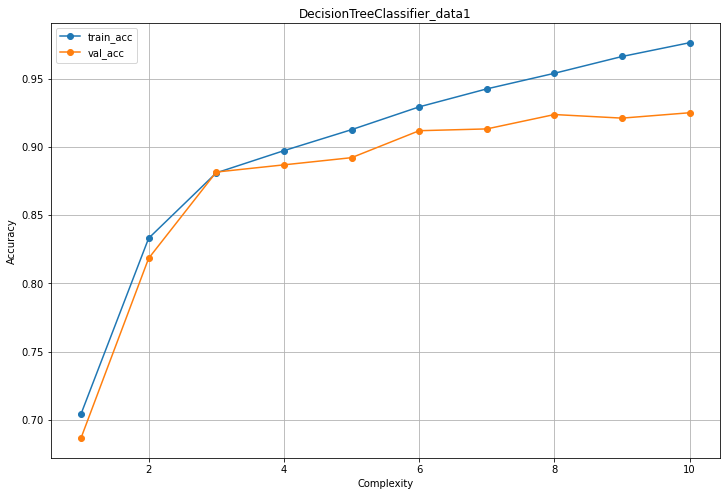

In [29]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,11))

for d in depth :
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(x_train1, y_train1)
    pred_tr, pred_val = model.predict(x_train1), model.predict(x_val1)
    result_train.append(accuracy_score(y_train1, pred_tr))
    result_val.append(accuracy_score(y_val1, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.title('DecisionTreeClassifier_data1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

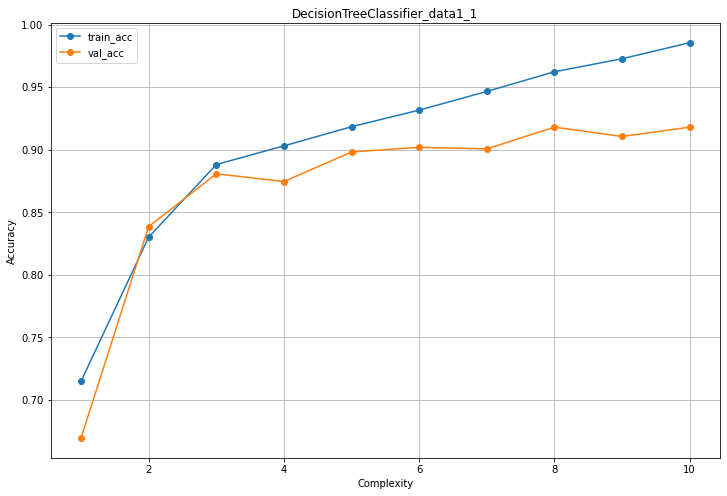

In [30]:
result_train = [] # train set을 가지고 예측한 결과
result_val = [] # val set을 가지고 예측한 결과
depth = list(range(1,11))

for d in depth :
    model = DecisionTreeClassifier(max_depth = d)
    model.fit(x_train2, y_train2)
    pred_tr, pred_val = model.predict(x_train2), model.predict(x_val2)
    result_train.append(accuracy_score(y_train2, pred_tr))
    result_val.append(accuracy_score(y_val2, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, result_train, label = 'train_acc', marker = 'o')
plt.plot(depth, result_val, label = 'val_acc', marker = 'o')

plt.title('DecisionTreeClassifier_data1_1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [31]:
params2 = {'max_depth' : range(3, 8)}
model2_1 = GridSearchCV(DecisionTreeClassifier(), params2, cv=10)
model2_2 = GridSearchCV(DecisionTreeClassifier(), params2, cv=10)
model2_1.fit(x_train1, y_train1)
pred2_1 = model2_1.predict(x_val1)
model2_2.fit(x_train2, y_train2)
pred2_2 = model2_2.predict(x_val2)

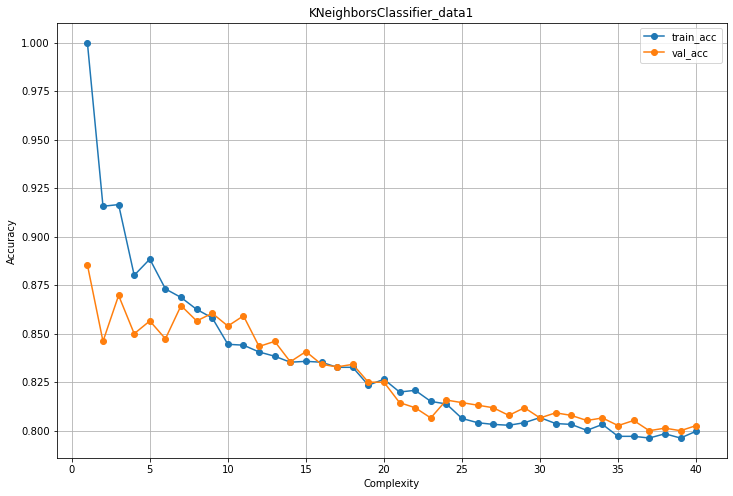

In [32]:
rs_train = []
rs_val = []
depth = list(range(1,41))

for d in depth :
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(x_train_s1, y_train1)
    pred_tr, pred_val = model.predict(x_train_s1), model.predict(x_val_s1)
    rs_train.append(accuracy_score(y_train1, pred_tr))
    rs_val.append(accuracy_score(y_val1, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('KNeighborsClassifier_data1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

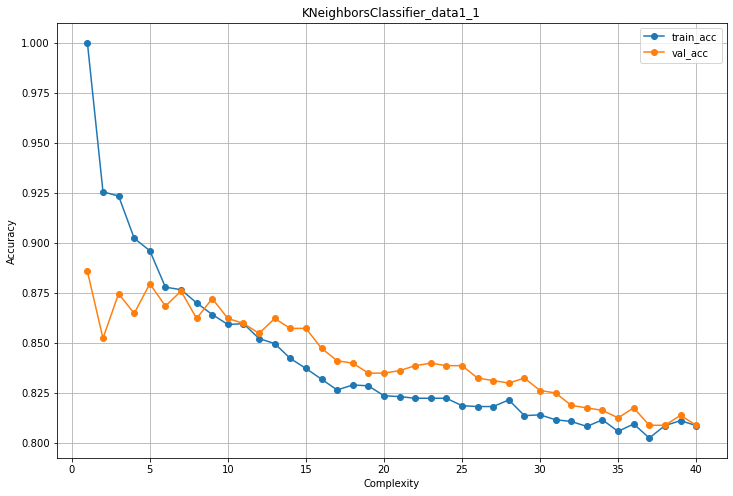

In [33]:
rs_train = []
rs_val = []
depth = list(range(1,41))

for d in depth :
    model = KNeighborsClassifier(n_neighbors=d)
    model.fit(x_train_s2, y_train2)
    pred_tr, pred_val = model.predict(x_train_s2), model.predict(x_val_s2)
    rs_train.append(accuracy_score(y_train2, pred_tr))
    rs_val.append(accuracy_score(y_val2, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('KNeighborsClassifier_data1_1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [34]:
params3 = {'n_neighbors' : range(10,27)}
model3_1 = GridSearchCV(KNeighborsClassifier(),params3, cv=10)
model3_2 = GridSearchCV(KNeighborsClassifier(),params3, cv=10)
model3_1.fit(x_train_s1, y_train1)
pred3_1 = model3_1.predict(x_val_s1)
model3_2.fit(x_train_s2, y_train2)
pred3_2 = model3_2.predict(x_val_s2)

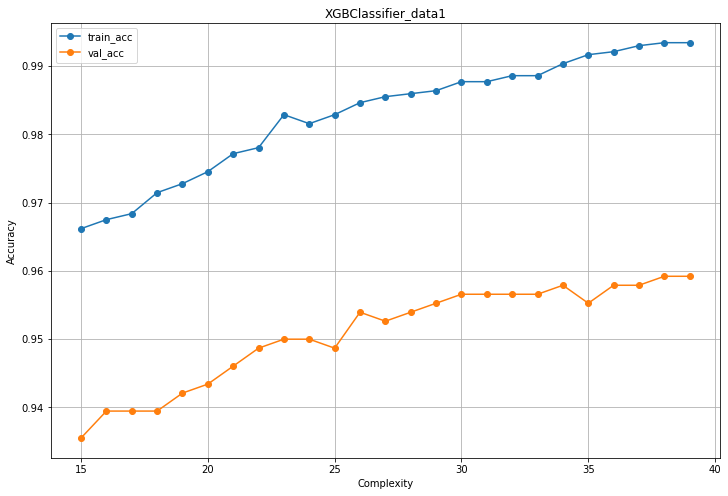

In [35]:
rs_train = []
rs_val = []
depth = list(range(15,40))
y_train1.replace({-1:0}, inplace=True)
y_val1.replace({-1:0}, inplace=True)
for d in depth :
    model = XGBClassifier(n_estimators = d)
    model.fit(x_train1, y_train1)
    pred_tr, pred_val = model.predict(x_train1), model.predict(x_val1)
    rs_train.append(accuracy_score(y_train1, pred_tr))
    rs_val.append(accuracy_score(y_val1, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('XGBClassifier_data1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_train1.replace({0:-1}, inplace=True)
y_val1.replace({0:-1}, inplace=True)

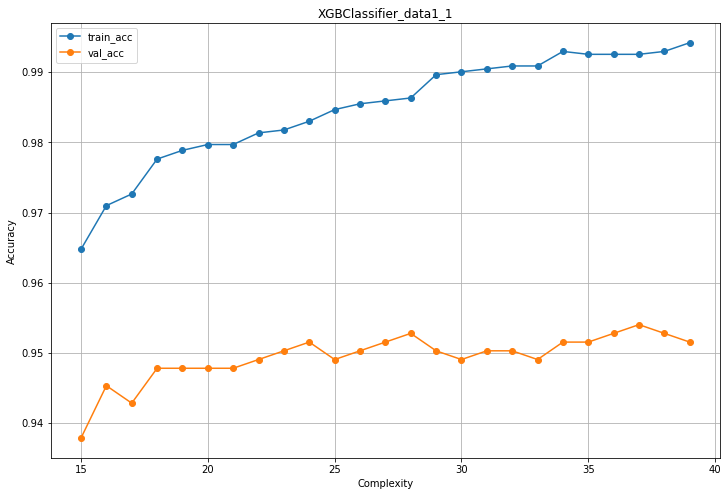

In [36]:
rs_train = []
rs_val = []
depth = list(range(15,40))
y_train2.replace({-1:0}, inplace=True)
y_val2.replace({-1:0}, inplace=True)
for d in depth :
    model = XGBClassifier(n_estimators = d)
    model.fit(x_train2, y_train2)
    pred_tr, pred_val = model.predict(x_train2), model.predict(x_val2)
    rs_train.append(accuracy_score(y_train2, pred_tr))
    rs_val.append(accuracy_score(y_val2, pred_val))
    
plt.figure(figsize = (12,8))
plt.plot(depth, rs_train, label = 'train_acc', marker = 'o')
plt.plot(depth, rs_val, label = 'val_acc', marker = 'o')

plt.title('XGBClassifier_data1_1')
plt.xlabel('Complexity')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

y_train2.replace({0:-1}, inplace=True)
y_val2.replace({0:-1}, inplace=True)

In [37]:
params4 = {'n_estimators' : range(20, 31)}
model4_1 = GridSearchCV(XGBClassifier(), params4, cv=10)
model4_2 = GridSearchCV(XGBClassifier(), params4, cv=10)

In [38]:
y_train1.replace({-1:0}, inplace=True)
y_val1.replace({-1:0}, inplace=True)
y_train2.replace({-1:0}, inplace=True)
y_val2.replace({-1:0}, inplace=True)

model4_1.fit(x_train1, y_train1)
pred4_1 = model4_1.predict(x_val1)
model4_2.fit(x_train2, y_train2)
pred4_2 = model4_2.predict(x_val2)

y_train1.replace({0:-1}, inplace=True)
y_val1.replace({0:-1}, inplace=True)
y_train2.replace({0:-1}, inplace=True)
y_val2.replace({0:-1}, inplace=True)

In [39]:
params5 = {'max_depth' : range(3,10), 'min_samples_leaf' : range(1, 101, 10)}
model5_1 = GridSearchCV(RandomForestClassifier(), params5, cv=10)
model5_2 = GridSearchCV(RandomForestClassifier(), params5, cv=10)

In [40]:
model5_1.fit(x_train1, y_train1)
pred5_1 = model5_1.predict(x_val1)
model5_2.fit(x_train2, y_train2)
pred5_2 = model5_2.predict(x_val2)

In [42]:
# train 및 val 데이터 정확도 확인 
print(accuracy_score(y_val1,pred1_1))
print(accuracy_score(y_val1,pred2_1))
print(accuracy_score(y_val1,pred3_1))
y_val1.replace({-1:0}, inplace=True)
print(accuracy_score(y_val1,pred4_1))
y_val1.replace({0:-1}, inplace=True)
print(accuracy_score(y_val1,pred5_1))

0.8315789473684211
0.9118421052631579
0.8592105263157894
0.95
0.9355263157894737


In [43]:
# train 및 val 데이터 정확도 확인 
print(accuracy_score(y_val2,pred1_2))
print(accuracy_score(y_val2,pred2_2))
print(accuracy_score(y_val2,pred3_2))
y_val2.replace({-1:0}, inplace=True)
print(accuracy_score(y_val2,pred4_2))
y_val2.replace({0:-1}, inplace=True)
print(accuracy_score(y_val2,pred5_2))

0.8248447204968944
0.901863354037267
0.8596273291925466
0.9490683229813665
0.9329192546583851


In [ ]:
#joblib.dump(model4, './XGB_model.pkl')

In [44]:
joblib.dump(model4_1, './XGB_model4_1.pkl')
joblib.dump(model4_2, './XGB_model4_2.pkl')

['./XGB_model4_2.pkl']